<a href="https://colab.research.google.com/github/Ishika1323/Ragini-ML-project-/blob/main/Ragini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Music Generator
A Deep Learning Project to generate music using Recurrent Neural Networks
trained on Maestro dataset from Google.
## Installs

In [ ]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install pretty_midi

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

## Imports

In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf
from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
_SAMPLING_RATE = 16000

In [ ]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

59243107/59243107 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import zipfile
from pathlib import Path

zip_path = Path('/content/maestro-v2.0.0-midi.zip')  # Update this to your zip file path
# Change the extract_dir to a directory name instead of a file name
extract_dir = Path('/content/maestro-v2.0.0_extracted')

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

## Sample File

In [ ]:
import glob
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000  # or whatever rate you want

def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
    waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
    waveform_short = waveform[:seconds*_SAMPLING_RATE]
    return display.Audio(waveform_short, rate=_SAMPLING_RATE)

data_dir = extract_dir  # Use the directory where you extracted the files
filenames = glob.glob(str(data_dir/'**/*.mid*'), recursive=True)
sample_file = filenames[1]
pm = pretty_midi.PrettyMIDI(sample_file)
display_audio(pm)

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

# Use recursive=True to search subdirectories for .mid* files
filenames = glob.glob(str(data_dir/'**/*.mid*'), recursive=True)

# Add a check to ensure files were found before accessing the list
if not filenames:
  print(f"Error: No MIDI files found in {data_dir}. Please ensure the dataset was downloaded and extracted correctly.")
else:
  # Access the first file if the list is not empty. Using index 0 is safer
  # if you just need a sample file and are not specifically looking for the second one.
  sample_file = filenames[0]
  pm = pretty_midi.PrettyMIDI(sample_file)
  display_audio(pm)

## First 25 Notes
The entire song is a compilation of multiple notes, each of which has three properties: pitch, name, and duration.

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

# This line should now populate filenames with midi files if the dataset is present
filenames = glob.glob(str(data_dir/'**/*.mid*'))

# Add a check to ensure files were found before accessing the list
if not filenames:
  print(f"Error: No MIDI files found in {data_dir}. Please ensure the dataset was downloaded and extracted correctly.")
else:
  sample_file = filenames[1]
  pm = pretty_midi.PrettyMIDI(sample_file)
  display_audio(pm)

Error: No MIDI files found in /content/maestro-v2.0.0_extracted. Please ensure the dataset was downloaded and extracted correctly.


In [ ]:
instrument = pm.instruments[0]
for i, note in enumerate(instrument.notes[:25]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=48, note_name=C3, duration=0.0417
1: pitch=43, note_name=G2, duration=0.0552
2: pitch=36, note_name=C2, duration=0.2625
3: pitch=52, note_name=E3, duration=0.0448
4: pitch=48, note_name=C3, duration=0.0385
5: pitch=52, note_name=E3, duration=0.0437
6: pitch=43, note_name=G2, duration=0.0427
7: pitch=48, note_name=C3, duration=0.0417
8: pitch=43, note_name=G2, duration=0.0396
9: pitch=52, note_name=E3, duration=0.0385
10: pitch=43, note_name=G2, duration=0.0406
11: pitch=48, note_name=C3, duration=0.0437
12: pitch=52, note_name=E3, duration=0.0427
13: pitch=36, note_name=C2, duration=0.0146
14: pitch=52, note_name=E3, duration=0.0531
15: pitch=48, note_name=C3, duration=0.0448
16: pitch=43, note_name=G2, duration=0.0396
17: pitch=36, note_name=C2, duration=0.0094
18: pitch=52, note_name=E3, duration=0.0656
19: pitch=43, note_name=G2, duration=0.0490
20: pitch=48, note_name=C3, duration=0.0562
21: pitch=36, note_name=C2, duration=0.0458
22: pitch=48, note_name=C3, duration=0.059

## Extract all notes in the MIDI files

In [ ]:
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)
  # Sorting the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start
  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start
  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,36,1.003125,1.265625,0.000000,0.262500
1,43,1.206250,1.261458,0.203125,0.055208
2,48,1.217708,1.259375,0.011458,0.041667
3,52,1.221875,1.266667,0.004167,0.044792
4,48,1.391667,1.430208,0.169792,0.038542


## Plot Piano Roll of first 50 Notes

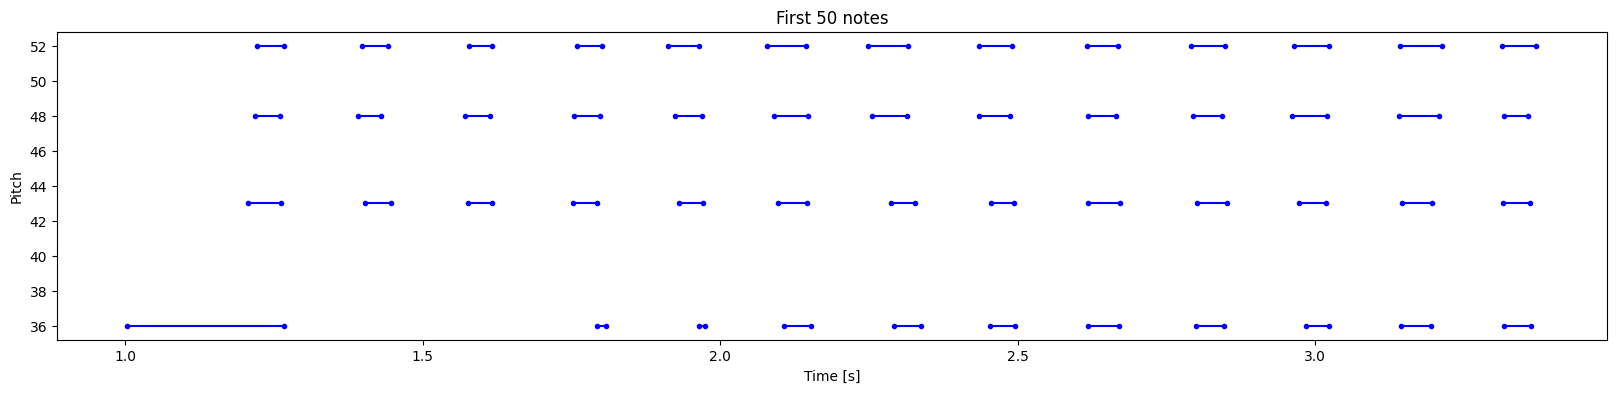

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)
plot_piano_roll(raw_notes, count=50)

## Sample Generated File

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)
display_audio(example_pm)

## Creating Training Data Set

Note: This may take a significant amount of time. For this, we have set the num_files to 5 to ensure a relatively faster process.

In [ ]:
import glob
import pretty_midi
from IPython import display
import pandas as pd # Import pandas

_SAMPLING_RATE = 16000  # or whatever rate you want

def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
    waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
    waveform_short = waveform[:seconds*_SAMPLING_RATE]
    return display.Audio(waveform_short, rate=_SAMPLING_RATE)

# Ensure data_dir is set to the correct extraction directory
# Assuming extract_dir was defined in a previous cell as pathlib.Path('/content/maestro-v2.0.0_extracted')
# If not, define it here or ensure the extraction cell runs before this one.
# For demonstration, let's assume extract_dir is defined.
# If you redefined data_dir in a previous cell, ensure it points to the extracted data.
# For example:
# data_dir = pathlib.Path('/content/maestro-v2.0.0_extracted') # Use the directory where you extracted the files

# Use recursive=True to search subdirectories for .mid* files
filenames = glob.glob(str(data_dir/'**/*.mid*'), recursive=True)

# Add a check to ensure files were found before proceeding
if not filenames:
  print(f"Error: No MIDI files found in {data_dir}. Please ensure the dataset was downloaded and extracted correctly.")
else:
  # Access the second file as in the original code, but using index 1.
  # Add a check to ensure there are at least two files if you specifically want the second one.
  if len(filenames) > 1:
    sample_file = filenames[1]
    pm = pretty_midi.PrettyMIDI(sample_file)
    display_audio(pm)
  elif len(filenames) == 1:
    print(f"Only one MIDI file found: {filenames[0]}. Using this file.")
    sample_file = filenames[0]
    pm = pretty_midi.PrettyMIDI(sample_file)
    display_audio(pm)
  else:
    # This case is covered by the initial check, but included for completeness
    print(f"Error: No MIDI files found in {data_dir}.")

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True) #1 extra for the labels
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  def scale_pitch(x):#Normalizing
    x = x/[vocab_size,1.0,1.0]
    return x

  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}
    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# ipython-input-25-1557f8d63c15 (modified)
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True) #1 extra for the labels
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Define key_order within the function or ensure it's globally available
  # Based on the raw_notes DataFrame columns: 'pitch', 'step', 'duration'
  # If key_order was defined elsewhere, ensure that cell was run.
  # For this example, we'll define it here assuming the structure from raw_notes.
  # A better approach is to define it once where you process your notes data.
  key_order = ['pitch', 'step', 'duration']

  def scale_pitch(x):#Normalizing
    # Ensure x is a float type for division
    x = tf.cast(x, tf.float32) / tf.constant([vocab_size, 1.0, 1.0], dtype=tf.float32)
    return x

  def split_labels(sequences):
    # Ensure sequences are structured correctly for splitting
    # Assuming sequences are batched tensors of shape (seq_length, num_features)
    inputs = sequences[:-1]
    labels_dense = sequences[-1]

    # Create a dictionary for the labels. This assumes the labels_dense tensor
    # has its elements corresponding to the order in key_order.
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}
    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

# ipython-input-26-1557f8d63c15 (modified)

# --- Add this section to create the notes_ds dataset ---
# This is a placeholder example assuming you want to use the raw_notes DataFrame
# as the source for your dataset.
# In a real scenario for training, you would likely process multiple MIDI files
# and combine their notes into a single DataFrame or directly into a dataset.

# Assuming raw_notes DataFrame is available from previous cells
# Convert the relevant columns of raw_notes DataFrame to a NumPy array or list
notes_array = raw_notes[['pitch', 'step', 'duration']].values

# Create a TensorFlow dataset from the array.
# Ensure the data type is appropriate. Using tf.float32 is generally recommended
# for model inputs, but pitch is integer-like before scaling.
# Let's start with int64 and then scale in the create_sequences function.
notes_ds = tf.data.Dataset.from_tensor_slices(tf.cast(notes_array, dtype=tf.int64))

# Determine the total number of notes for buffer size calculation
n_notes = len(raw_notes) # If using raw_notes, n_notes is the number of rows
# --- End of added section ---


seq_length = 25
vocab_size = 128

# Make sure key_order is defined and accessible here if not defined within
# create_sequences as shown in the modified version above.
# Example definition if it's not in create_sequences:
key_order = ['pitch', 'step', 'duration']


seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset

# Add a check to ensure buffer_size is positive
if buffer_size <= 0:
    print(f"Warning: Buffer size ({buffer_size}) is not positive. This may cause issues with shuffling.")
    print(f"n_notes: {n_notes}, seq_length: {seq_length}")
    # Adjust buffer_size to a small positive value if necessary to avoid errors,
    # or investigate why n_notes is not significantly larger than seq_length.
    if n_notes > seq_length:
        buffer_size = 1 # Use a minimal positive buffer size
    else:
        # If not enough notes to form a single sequence of length seq_length + 1,
        # the dataset will be empty after windowing, which is expected.
        # You might want to add a check to see if seq_ds is empty.
        pass


train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float32, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.int64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.int64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.int64, name=None)})

## Building the Model

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=loss, optimizer=optimizer)
losses = model.evaluate(train_ds, return_dict=True)
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)
model.summary()

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - duration_loss: 0.0807 - loss: 4.9400 - pitch_loss: 4.8525 - step_loss: 0.0068


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 25, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │     67,584 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration (Dense)    │ (None, 1)         │        129 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pitch (Dense)       │ (None, 128)       │     16,512 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step (Dense)        │ (None, 1)         │        129 │ lstm[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 84,354 (329.51 KB)

 Trainable params: 84,354 (329.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.evaluate(train_ds, return_dict=True)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - duration_loss: 0.0807 - loss: 0.3301 - pitch_loss: 4.8525 - step_loss: 0.0068


{'duration_loss': 0.08459603786468506,
 'loss': 0.3332459628582001,
 'pitch_loss': 4.8062968254089355,
 'step_loss': 0.008335004560649395}

## Training the Model
This may take 3-5 minutes

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}.weights.h5', # Changed filepath here
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - duration_loss: 0.0828 - loss: 0.3368 - pitch_loss: 4.6603 - step_loss: 0.0210
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - duration_loss: 0.0532 - loss: 0.2784 - pitch_loss: 4.1803 - step_loss: 0.0163
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - duration_loss: 0.0493 - loss: 0.2685 - pitch_loss: 4.0867 - step_loss: 0.0148
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - duration_loss: 0.0493 - loss: 0.2541 - pitch_loss: 3.9942 - step_loss: 0.0051
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - duration_loss: 0.0591 - loss: 0.2689 - pitch_loss: 4.0861 - step_loss: 0.0055
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - duration_loss: 0.0469 - loss: 0.2512 - pitch_loss: 3.9880 - step_loss: 0.0049
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - duration_loss: 0.0450 - loss: 0.2477 - pitch_loss: 3.9442 - step_loss: 0.0055
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - duration_loss: 0.0446 

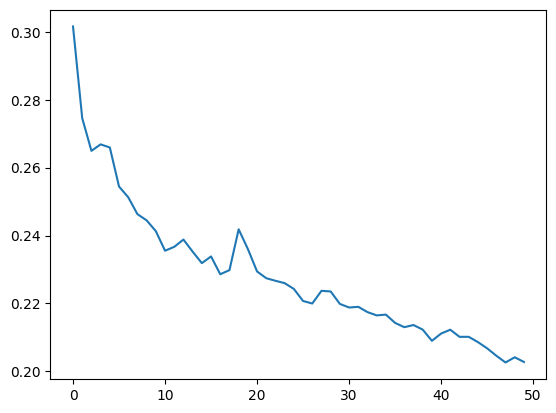

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

## Generating Songs

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    keras_model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 1.0
num_predictions = 360

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))
generated_notes.head(10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━

,pitch,step,duration,start,end
0,47,0.016661,0.044700,0.016661,0.061362
1,55,0.099973,0.025652,0.116635,0.142287
2,64,0.097425,0.000000,0.214059,0.214059
3,47,0.118268,0.000000,0.332327,0.332327
4,60,0.088294,0.000000,0.420621,0.420621
5,41,0.117242,0.000000,0.537863,0.537863
6,50,0.082969,0.000000,0.620832,0.620832
7,74,0.110586,0.000000,0.731418,0.731418
8,84,0.110379,0.000000,0.841797,0.841797
9,52,0.128898,0.000000,0.970695,0.970695


In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)